In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load Data:
Air=pd.read_excel('Airlines+Data.xlsx')
Air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
Air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
Air.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [5]:
Air.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [6]:
Air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


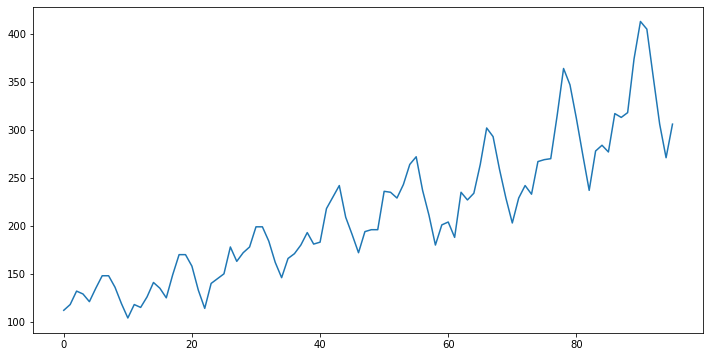

In [7]:
Air['Passengers'].plot(figsize=(12,6))
plt.show()

In [8]:
#Extraction of date,month,year:
Air["Date"]=pd.to_datetime(Air.Month, format=("%b-%y"))

In [9]:
Air["month"]=Air.Date.dt.strftime("%b")
Air["year"]=Air.Date.dt.strftime("%y")

In [10]:
Air

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,95
1,1995-02-01,118,1995-02-01,Feb,95
2,1995-03-01,132,1995-03-01,Mar,95
3,1995-04-01,129,1995-04-01,Apr,95
4,1995-05-01,121,1995-05-01,May,95
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,02
92,2002-09-01,355,2002-09-01,Sep,02
93,2002-10-01,306,2002-10-01,Oct,02
94,2002-11-01,271,2002-11-01,Nov,02


<Figure size 1728x576 with 0 Axes>

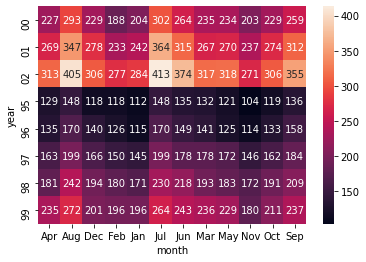

<Figure size 1728x576 with 0 Axes>

In [11]:
#EDA
heatmap_y_month=pd.pivot_table(data=Air,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.figure(figsize=(24,8))

<AxesSubplot:xlabel='month', ylabel='Passengers'>

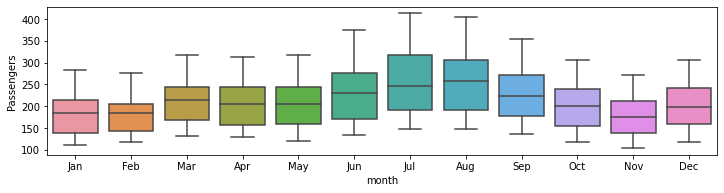

In [12]:
#plot:
plt.figure(figsize=(12,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=Air)


<AxesSubplot:xlabel='year', ylabel='Passengers'>

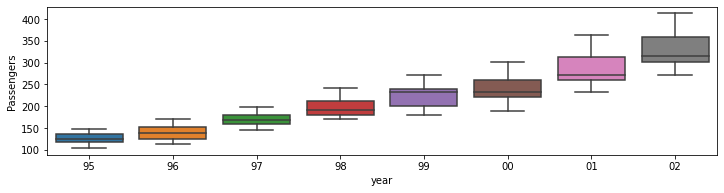

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Air)

<AxesSubplot:>

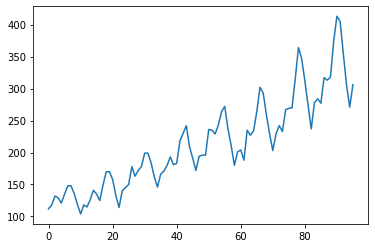

In [37]:


month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
#import numpy as np
A = Air["month"][0]
A[0:3]
Air['Month']= 0

for i in range(96):
    A = Air["month"][i]
    Air['month'][i]= A[0:3]
    
month_dummies = pd.DataFrame(pd.get_dummies(Air['month']))
Air1 = pd.concat([Air.Passengers,month_dummies],axis = 1)

Air1["t"] = np.arange(1,97)

Air1["t_square"] = Air1["t"]*Air1["t"]
Air1.columns
Air1["log_Passengers"] = np.log(Air1["Passengers"])
Air1.rename(columns={"Passengers ": 'Passengers'}, inplace=True)
Air1.Passengers.plot()

In [15]:
Air1

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<AxesSubplot:xlabel='year', ylabel='Passengers'>

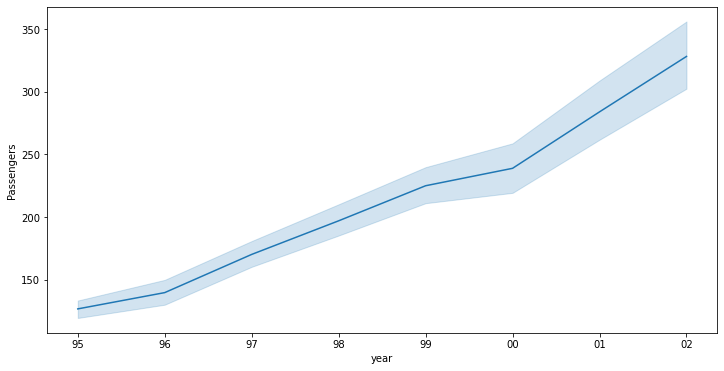

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(x="year",y="Passengers",data=Air)

<AxesSubplot:>

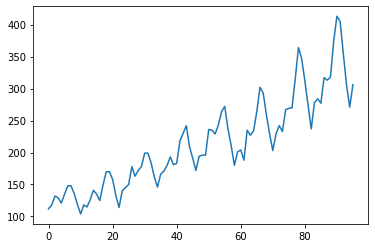

In [17]:
Air["Passengers"].plot()

In [18]:
Train=Air1.head(72)

In [19]:
Train

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,293,0,1,0,0,0,0,0,0,0,0,0,0,68,4624,5.680173
68,259,0,0,0,0,0,0,0,0,0,0,0,1,69,4761,5.556828
69,229,0,0,0,0,0,0,0,0,0,0,1,0,70,4900,5.433722
70,203,0,0,0,0,0,0,0,0,0,1,0,0,71,5041,5.313206


In [20]:
Test=Air1.iloc[72:84,:]
Test

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
72,242,0,0,0,0,1,0,0,0,0,0,0,0,73,5329,5.488938
73,233,0,0,0,1,0,0,0,0,0,0,0,0,74,5476,5.451038
74,267,0,0,0,0,0,0,0,1,0,0,0,0,75,5625,5.587249
75,269,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711
76,270,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422
77,315,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573
78,364,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154
79,347,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,5.849325
80,312,0,0,0,0,0,0,0,0,0,0,0,1,81,6561,5.743003
81,274,0,0,0,0,0,0,0,0,0,0,1,0,82,6724,5.613128


In [21]:
Predict=Air1.tail(12)
Predict

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585


In [22]:
Air2=Air1.iloc[0:84,:]

In [23]:

 import statsmodels.formula.api as smf

In [24]:
# Build model and calculate rmse:
linear_model=smf.ols('Passengers~t',data=Train).fit()
linear_predict=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
linear_predict

72    255.281299
73    257.264272
74    259.247245
75    261.230218
76    263.213192
77    265.196165
78    267.179138
79    269.162111
80    271.145084
81    273.128058
82    275.111031
83    277.094004
dtype: float64

In [25]:
#Rmse:
linear_rmse=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(linear_predict))**2))
linear_rmse

42.78656082093165

In [26]:
#Exponential & rmse:
Exp=smf.ols('log_Passengers~t',data=Train).fit()
predict_Exp=pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(predict_Exp)))**2))
rmse_exp

38.78176181392993

#Calculate:Quardatic,additive seasonality, additive seasonity quardatic,multiple Seasonility,multiple  additive Seasonality 

In [27]:
#Quardatic:
quar=smf.ols('Passengers~t+t_square',data=Train).fit()
predict_quar=pd.Series(quar.predict(Test[['t','t_square']]))
quar_rmse=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predict_quar))**2))
quar_rmse

42.94925714948836

In [28]:
#Additive Seasonality:
adsea=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
adsea_predict=pd.Series(adsea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
adsea_rmse=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(adsea_predict))**2))
adsea_rmse

103.1143176285428

In [29]:
#additive seasonality quardatric:
adsea_qr=smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_adsea=pd.Series(adsea_qr.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_square']]))
adsea_rmse_qr=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_adsea))**2))
adsea_rmse_qr

25.481375031752155

In [30]:
#Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

108.10379108134953

In [31]:
#Multiplicative Additive Seasonality
Mul_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea1 = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea1

11.820420950122394

In [32]:
#Compare the results:
data={"Model":pd.Series(["linear_rmse","rmse_exp","quar_rmse","adsea_rmse","adsea_rmse_qr","rmse_Mult_sea","rmse_Mult_sea1"]),"RMSE_Values":pd.Series([linear_rmse,rmse_exp,quar_rmse,adsea_rmse,adsea_rmse_qr,rmse_Mult_sea,rmse_Mult_sea1])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])



,Model,RMSE_Values
6,rmse_Mult_sea1,11.820421
4,adsea_rmse_qr,25.481375
1,rmse_exp,38.781762
0,linear_rmse,42.786561
2,quar_rmse,42.949257
3,adsea_rmse,103.114318
5,rmse_Mult_sea,108.103791


In [33]:
#Predict for new data:
Predict

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585


In [34]:
model_full=smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Air2)

In [35]:
predict_new=pd.Series(Mul_sea.predict(Predict))
predict_new

84    5.637978
85    5.662487
86    5.808210
87    5.765280
88    5.753323
89    5.865720
90    5.966763
91    5.975173
92    5.867869
93    5.740788
94    5.611277
95    5.746501
dtype: float64

In [36]:
#add predict_new to Predict:
Predict["Forcasted_Passengers"]=pd.DataFrame(predict_new)
Predict

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers,Forcasted_Passengers
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974,5.637978
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018,5.662487
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902,5.808210
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203,5.765280
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051,5.753323
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256,5.865720
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448,5.966763
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887,5.975173
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118,5.867869
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585,5.740788
